Author: Muaaz Bin Sarfaraz

# Task - DAINSTUDIOS

Please generate a single(!) insight from the [given data set](http://www.europeansocialsurvey.org/downloadwizard/) and be prepared to communicate the insight and the methods that led you to it, including any code you have written.

A single insight is enough and there is no need to look for the “best” insight. We will use this task as a starting point for more discussion.

# Approach
Import the dataset and perform basic data wrangling before moving towards exploratory analytics.
During exploratory analytics find a single insight of interest and then if possible confirm it using statistical techniques or other datasets

The data was selected with following check boxes Ticked!
1. Gender, age and household composition (72/72)
2. ESS Round = 7
3. Country = Finland

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('C:\DAINSTUDIOS\ESS1-7e01_2\ESS1-7e01.csv')
df.head()

,cntry,cname,cedition,cproddat,cseqno,name,essround,edition,idno,dweight,...,rship14,rshipa14,rship15,rshipa15,rship16,rshipa16,rship17,rshipa17,rship18,rshipa18
0,FI,ESS1-7e01,1,08.12.2016,127754,ESS7e02_1,7,2.1,10001,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FI,ESS1-7e01,1,08.12.2016,127755,ESS7e02_1,7,2.1,10002,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FI,ESS1-7e01,1,08.12.2016,127756,ESS7e02_1,7,2.1,10003,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FI,ESS1-7e01,1,08.12.2016,127757,ESS7e02_1,7,2.1,10005,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FI,ESS1-7e01,1,08.12.2016,127758,ESS7e02_1,7,2.1,10006,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Wrangling
On reading the file we can observe that the dataset has 84 columns and many contain NaN values. 
Lets check how many missing values are there so we may drop columns with high missing values from further analysis
or 
impute values if the percentage of missing values is low.

Steps:

1. Drop columns with high missing values
2. Impute where missing values are low
3. Drop unary features (forexample cnry: FI, it contains only FI)
4. Duplicate columns

In [4]:
missingvalues_col=[] #creating empty list
for i in range(84):
    if  df.iloc[:,i].count()< (len(df.index)*0.3): #if count of values in the column is less than 30% of total row count
        missingvalues_col.append(i)
print (missingvalues_col) #column index where missing values are more than 70%

[26, 27, 28, 29, 30, 45, 46, 47, 48, 49, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83]


In [5]:
df.drop(df.columns[[missingvalues_col]], axis=1, inplace=True) 
df.describe()

,cedition,cseqno,essround,edition,idno,dweight,pspwght,pweight,hhmmb,gndr,...,rship9,rshipa9,rship10,rshipa10,rship11,rshipa11,rship12,rshipa12,rship13,rshipa13
count,2087.0,2087.000000,2087.0,2.087000e+03,2087.000000,2087.0,2087.000000,2.087000e+03,2087.000000,2087.000000,...,2087.00000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,1.0,128797.000000,7.0,2.100000e+00,11680.584571,1.0,1.000000,2.183157e-01,2.360326,1.507906,...,5.98850,65.787254,5.990417,65.817920,5.993292,65.878294,5.998083,65.969334,5.998083,65.969334
std,0.0,602.609326,0.0,3.642404e-14,963.981266,0.0,0.232462,5.441397e-15,1.325145,0.500057,...,0.20507,3.668525,0.185537,3.392141,0.157744,2.778244,0.087559,1.400937,0.087559,1.400937
min,1.0,127754.000000,7.0,2.100000e+00,10001.000000,1.0,0.700639,2.183157e-01,1.000000,1.000000,...,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,1.0,128275.500000,7.0,2.100000e+00,10860.500000,1.0,0.820962,2.183157e-01,1.500000,1.000000,...,6.00000,66.000000,6.000000,66.000000,6.000000,66.000000,6.000000,66.000000,6.000000,66.000000
50%,1.0,128797.000000,7.0,2.100000e+00,11679.000000,1.0,0.923413,2.183157e-01,2.000000,2.000000,...,6.00000,66.000000,6.000000,66.000000,6.000000,66.000000,6.000000,66.000000,6.000000,66.000000
75%,1.0,129318.500000,7.0,2.100000e+00,12505.500000,1.0,1.129801,2.183157e-01,3.000000,2.000000,...,6.00000,66.000000,6.000000,66.000000,6.000000,66.000000,6.000000,66.000000,6.000000,66.000000
max,1.0,129840.000000,7.0,2.100000e+00,13399.000000,1.0,2.067547,2.183157e-01,13.000000,2.000000,...,6.00000,66.000000,6.000000,66.000000,6.000000,66.000000,6.000000,66.000000,6.000000,66.000000


Some cols have standard deviation of zero meaning they have only one value through out the column.
Such columns are unary and hold not much information.

In [6]:
missingvalues_col=[] #creating empty list
for i in range(df.shape[1]):
    if  df.iloc[:,i].count()< (len(df.index)): #if count of values in the column is less than 30% of total row count
        missingvalues_col.append(i)
print (missingvalues_col) #column index where missing values are more than 70%

[]


In [8]:
df.to_csv('test_ess.csv')

In [7]:
df.head()

,cntry,cname,cedition,cproddat,cseqno,name,essround,edition,idno,dweight,...,rship9,rshipa9,rship10,rshipa10,rship11,rshipa11,rship12,rshipa12,rship13,rshipa13
0,FI,ESS1-7e01,1,08.12.2016,127754,ESS7e02_1,7,2.1,10001,1,...,6,66,6,66,6,66,6,66,6,66
1,FI,ESS1-7e01,1,08.12.2016,127755,ESS7e02_1,7,2.1,10002,1,...,6,66,6,66,6,66,6,66,6,66
2,FI,ESS1-7e01,1,08.12.2016,127756,ESS7e02_1,7,2.1,10003,1,...,6,66,6,66,6,66,6,66,6,66
3,FI,ESS1-7e01,1,08.12.2016,127757,ESS7e02_1,7,2.1,10005,1,...,6,66,6,66,6,66,6,66,6,66
4,FI,ESS1-7e01,1,08.12.2016,127758,ESS7e02_1,7,2.1,10006,1,...,6,66,6,66,6,66,6,66,6,66


No missing values any more, no need to impute!

## Data Visualisation

From feature description file we have read what each abbreviation stands for!
The dataset contains gender age and household composition.

Lets look at the gender composition

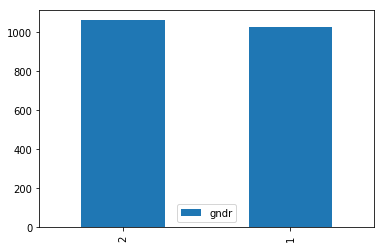

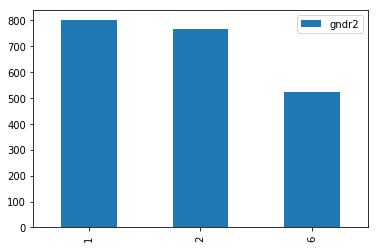

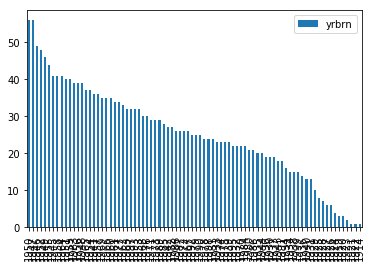

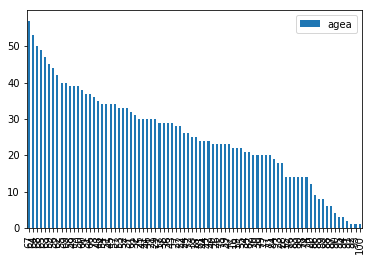

In [16]:


x_axis = ['gndr', 'gndr2', 'yrbrn','agea']
# get pd.Series of counts of each name


for col in x_axis:
    data_counts = df[col].value_counts()
    pd.DataFrame(data_counts).plot(kind='bar')
    plt.show()


## 1. Finding and Insight!

The initial finding is whatever mechanism European social surveyors followed had a reach to both genders almost equally (1. Male and 2. Female) as seen from the first bar chart.

Thus first single basic insight could be that the same survey approach could be successfully used for selling unisex products or services but might not be effective for products or services highly tailored for one gender. But I could be wrong as well. The respondent of Gender A could be interested for a product relevant to Gender B.

Lets see the age distribution on a bigger figure using histogram

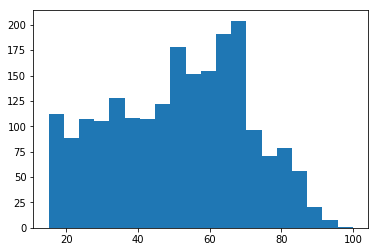

In [22]:
#Using histogram for continous data 
plt.hist(df['agea'], 20)
plt.show()

The age distribution is not normal(bell shaped)  but rather a bit positively skewed.
Quite a lot of teens have been approached in this ESS-Survey.

Lets see the age distribution for each gender!

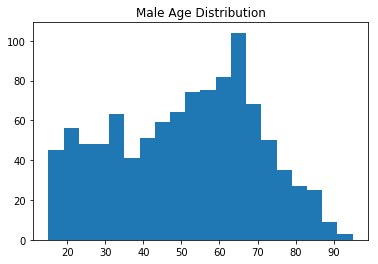

In [24]:
df_male = df[df['gndr'] ==1]


plt.hist(df_male['agea'], 20)
plt.title('Male Age Distribution')
plt.show()

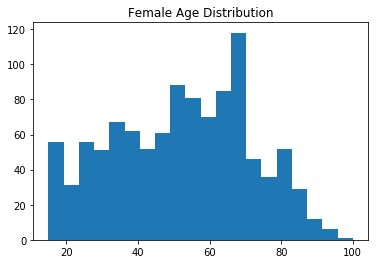

In [25]:
df_female = df[df['gndr'] ==2]

plt.hist(df_female['agea'], 20)
plt.title('Female Age Distribution')
plt.show()

## 2. Finding and Insight!

Almost similar distribution irrespective of the gender.
The other finding is that the finnish population compromises of more people in the age bracket of 45-75
rather than 15-45. Since the data for 0-15 age is missing but still one can safely assume middle aged population seems higher.

The insight is that the Finland has a negative or slow population growth. It needs more youngsters to replace the middle aged people to run its economy and perhaps is looking into solving this problem by easier immigration policies.

# Future Work

1. Confirming findings and insight using atleast one other data source.
2. Do trend analysis by incorporating other ESS rounds' (Years') data to confirm the finindg of Round 7.
3. Show your results to a third party for unbias critical evaluation of your analysis.
4. Research on the internet to see the findings make sense.

## Note:

Please note that from the email it seems that I was suppose to do a very basic analysis and present only one insight.
The work I did here took about 2 hours and is quite basic. If an in depth analysis is needed with interesting insights using bigger datasets with more features, kindly suggest.